In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
mean = df['Age'].mean()

In [6]:
df['Age'] = df['Age'].fillna(mean)

In [7]:
survival_rate = df.groupby('Sex')['Survived'].mean()
survival_rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [8]:
count = df['Sex'].value_counts()
count

Sex
male      577
female    314
Name: count, dtype: int64

<BarContainer object of 2 artists>

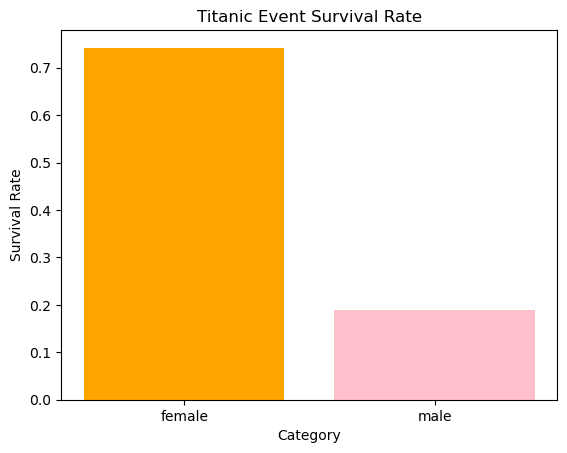

In [29]:
# Bar chart plot; Titanic Event survival rate

plt.bar(survival_rate.index, survival_rate.values)
plt.title("Titanic Event Survival Rate")
plt.xlabel("Category")
plt.ylabel("Survival Rate")
plt.bar(survival_rate.index, survival_rate.values, color='pink')
fig, ax = plt.bar(survival_rate.index, survival_rate.values)
plt.bar(survival_rate.index, survival_rate.values, color=['orange', 'pink'])

In [10]:
# Survival rate by Passenger class
Pclass_mean = df.groupby('Pclass')['Survived'].mean()
Pclass_mean

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<BarContainer object of 3 artists>

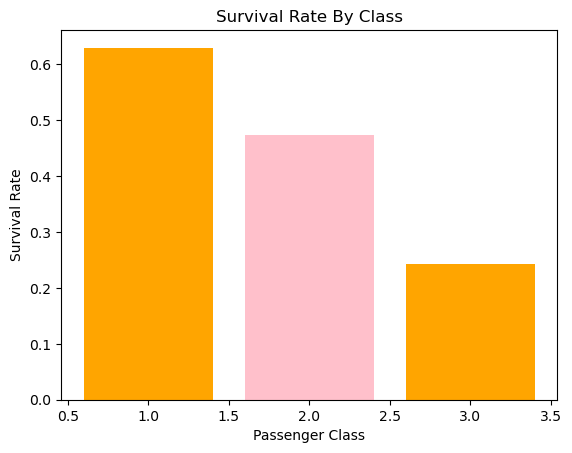

In [11]:
# Bar chart plot; Survival rate by class
plt.bar(Pclass_mean.index, Pclass_mean.values)
plt.title("Survival Rate By Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.savefig("titanic_survival_rate_by_class.png")
plt.bar(Pclass_mean.index, Pclass_mean.values, color=['orange', 'pink'])
plt.grid(axis='y', linestyle='--')

In [28]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 19, 59, 100], labels=['children', 'teenagers', 'adults', 'seniors'])
agegroup_mean = df.groupby('AgeGroup')['Survived'].mean()
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 30, 50, 100, 500], labels=['Low', 'Medium', 'High', 'Very High'])
faregroup_mean = df.groupby('FareGroup')['Survived'].mean()

agegroup_mean
faregroup_mean

/tmp/ipykernel_6035/3569472388.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_mean = df.groupby('AgeGroup')['Survived'].mean()
/tmp/ipykernel_6035/3569472388.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faregroup_mean = df.groupby('FareGroup')['Survived'].mean()


FareGroup
Low          0.319315
Medium       0.364865
High         0.654206
Very High    0.720000
Name: Survived, dtype: float64

In [24]:
# Survival rate by sex and passenger class
try:
    df = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Error: The file 'train.csv' was not found")
    exit()
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
survival_by_sex_pclass = df.groupby(['Sex', 'Pclass'])['Survived'].mean()
survival_by_sex_pclass

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [30]:
# Handles missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Unstacks the data to prepare it for the grouped bar chart
unstacked_data = survival_by_sex_pclass.unstack()
unstacked_data

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


The grouped bar chart has been saved as 'titanic_survival_by_sex_and_class.png'.


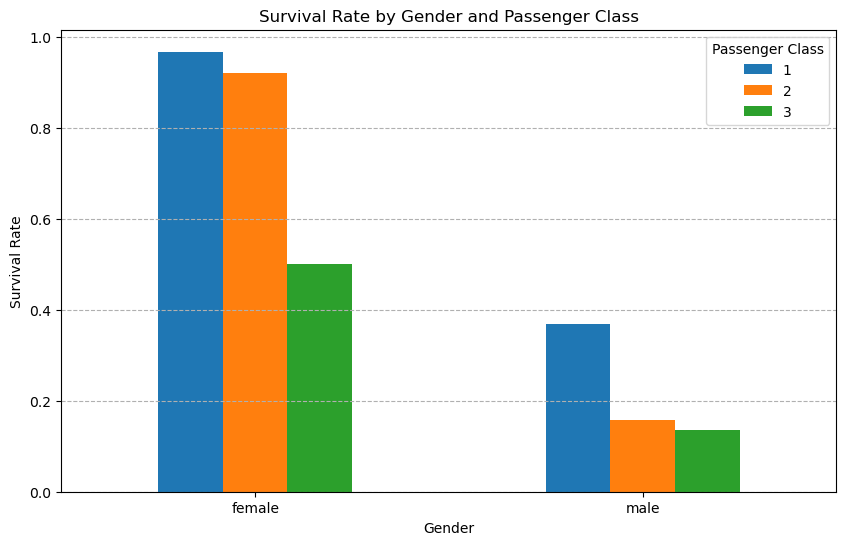

In [31]:

# Handle missing values as we did previously
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Group by both Sex and Pclass and calculate the mean survival rate
survival_by_sex_pclass = df.groupby(['Sex', 'Pclass'])['Survived'].mean()

# Unstack the data to prepare it for a grouped bar chart
unstacked_data = survival_by_sex_pclass.unstack()

# Create the grouped bar chart using the plot() method
unstacked_data.plot(kind='bar', figsize=(10, 6))

# Add labels and a title to make the plot clear
plt.title("Survival Rate by Gender and Passenger Class")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.legend(title='Passenger Class')
plt.grid(axis='y', linestyle='--')

# Save the plot to a file
plt.savefig("titanic_survival_by_sex_and_class.png")

print("The grouped bar chart has been saved as 'titanic_survival_by_sex_and_class.png'.")